**IMPORT THE REQUIRED PACKAGES & LIBRARIES**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import cairo
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform, seed
import random
import numpy as np
import time
from igraph import *
from igraph import Graph
print("Modules Imported")

Modules Imported


**INDEPENDENT CASCADE EXAMPLE** 

In [2]:
print("Independent Cascade Example")
def ic(G,s):
    print(s)
    jst_inf=list(s)
    infected=list(s)
    while(1):
        print(jst_inf, infected)
        if len(jst_inf)==0:
            return infected
        tmp=[]
        for each in jst_inf:
            for each1 in G.neighbors(each):
                r=random.uniform(0,1)
                if r<0.5 and each1 not in infected and each1 not in tmp:
                    tmp.append(each1)
        for each in tmp:
            infected.append(each)
        jst_inf=list(tmp)

G=nx.Graph()
G.add_edges_from([(1,2), (3,11), (2,9), (4,5), (5,6), (5,7), (5,8), (5,9), (5,10), (10, 11), (10,13), (11,13), (12,14), (12,15), (13,14), (13,15), (13,16), (13,17), (14, 15), (14, 16), (15,16)])
seed=[5,9]
list1=ic(G,seed)

Independent Cascade Example
[5, 9]
[5, 9] [5, 9]
[6, 7, 8, 2] [5, 9, 6, 7, 8, 2]
[] [5, 9, 6, 7, 8, 2]


**INDEPENDENT CASCADE ALGORITHM**

In [3]:
def Independent_Cascade(g,S,p=0.5,mon=1000):
    sp = []
    for i in range(mon):      
        new, X = S[:], S[:]
        while new:
            new_nodes = []
            for j in new:
                np.random.seed(i)
                success = np.random.uniform(0,1,len(g.neighbors(j,mode="out"))) < p
                new_nodes += list(np.extract(success, g.neighbors(j,mode="out")))
            new = list(set(new_nodes) - set(X))
            X += new
        sp.append(len(X))
    return(np.mean(sp))
print("Independent Cascade Done")

Independent Cascade Done


**GREEDY ALGORITHM**

In [4]:
def greedy(g,k,p=0.1,mon=1000):
    S, sp, t, start = [], [], [], time.time()
    for _ in range(k):
        best = 0
        for j in set(range(g.vcount()))-set(S):
            s = Independent_Cascade(g,S + [j],p,mon)
            if s > best:
                best, n = s, j
        S.append(n)
        sp.append(best)
        t.append(time.time() - start)
    return(S,sp,t)
print("Greedy Done")

Greedy Done


**COST EFFECTIVE LAZY FORWARD**

In [5]:
def celf(g,k,p=0.1,mon=1000):  
    start = time.time() 
    mg = [Independent_Cascade(g,[n],p,mon) for n in range(g.vcount())] 
    Q = sorted(zip(range(g.vcount()),mg), key=lambda x: x[1],reverse=True)
    S, sp, SP = [Q[0][0]], Q[0][1], [Q[0][1]]
    Q, l, t = Q[1:], [g.vcount()], [time.time()-start]
    for _ in range(k-1):    
        ch, nodech = False, 0
        while not ch:
            nodech += 1
            cur = Q[0][0]
            Q[0] = (cur,Independent_Cascade(g,S+[cur],p,mon) - sp)
            Q = sorted(Q, key = lambda x: x[1], reverse = True)
            ch = (Q[0][0] == cur)
        sp += Q[0][1]
        S.append(Q[0][0])
        SP.append(sp)
        l.append(nodech)
        t.append(time.time() - start)
        Q = Q[1:]
    return(S,SP,t,l)
print("CELF Done")

CELF Done


**SMALL GRAPH**

Number of vertices: 10
Number of edges: 19
Number of neighbors:  [6]


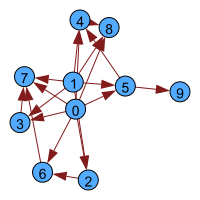

In [6]:
start = [0,0,0,0,0,0,0,1,1,1,1,1,1,2,3,4,5,6,5]
end   = [2,3,4,5,6,7,8,2,3,4,5,7,8,6,7,8,9,7,4]

g = Graph(directed=True)
g.add_vertices(range(10))
g.add_edges(zip(start,end))
print('Number of vertices:',  g.vcount())
print('Number of edges:',  g.ecount())
print('Number of neighbors: ', g.neighbors(2, mode='out'))
g.get_adjlist()

g.vs["label"], g.es["color"], g.vs["color"] = range(10), "#821b1b", "#52abff"
plot(g,bbox = (200,200),margin = 20,layout = g.layout("kk"))

**SMALL GRAPH ANALYSIS**

In [7]:
celf_final   = celf(g,3,p = 0.5,mon = 1020)
greedy_final = greedy(g,3,p = 0.5,mon = 1020)

print("Celf Algorithm:")
print(celf_final)
print("Greedy Algorithm:")
print(greedy_final)

Celf Algorithm:
([0, 1, 5], [5.597058823529411, 6.840196078431372, 7.749019607843137], [0.8055369853973389, 2.165189743041992, 3.079880714416504], [10, 7, 4])
Greedy Algorithm:
([0, 1, 5], [5.597058823529411, 6.840196078431372, 7.749019607843137], [0.7047641277313232, 2.4113576412200928, 4.211446285247803])


**BIG GRAPH**

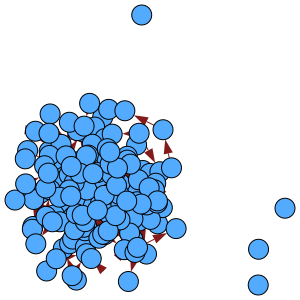

In [8]:
G = Graph.Erdos_Renyi(n=150,m=270,directed=True)

G.es["color"], G.vs["color"], G.vs["label"] = "#821b1b", "#52abff", ""
plot(G, bbox = (300, 300),margin = 15,layout = G.layout("kk"))

**BIG GRAPH ANALYSIS**

In [ ]:
celf_final   = celf(G,6,p = 0.5,mon = 1020)
greedy_final = greedy(G,6,p = 0.5,mon = 1020)

print("Celf Algorithm:   " + str(celf_final[0]))
print("Greedy Algorithm: " + str(greedy_final[0]))

**TIME ANALYSIS OF EACH ALGORITHM**

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['lines.linewidth'] = 5
plt.plot(range(1,len(greedy_final[2])+1),greedy_final[2],label="GREEDY",color="#52abff")
plt.plot(range(1,len(celf_final[2])+1),celf_final[2],label="CELF",color="#821b1b")
plt.ylabel('Computation Time (in seconds)'); plt.xlabel('Seed Set Size')
plt.title('Time Analysis'); plt.legend(loc=2);

In [ ]:
start = [0,0,0,0,0,0,0,1,1,1,1,1,1,2,3,4,5,6,5]
end   = [2,3,4,5,6,7,8,2,3,4,5,7,8,6,7,8,9,7,4]

g = Graph(directed=True)
g.add_vertices(range(10))
g.add_edges(zip(start,end))
print('Number of vertices:',  g.vcount())
print('Number of edges:',  g.ecount())
print('Number of neighbors: ', g.neighbors(2, mode='out'))
g.get_adjlist()

g.vs["label"], g.es["color"], g.vs["color"] = range(10), "#821b1b", "#52abff"
plot(g,bbox = (200,200),margin = 20,layout = g.layout("kk"))